In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2025-09-04 14:01:31.608752: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-04 14:01:32.604566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 14:01:36.029845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
digits = load_digits()
X = digits.data   # shape (1797, 64)
y = digits.target # digits 0-9

# Normalize data (0–1 scale)
X = X / 16.0

# One-hot encode labels
y_cat = to_categorical(y, 10)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [3]:
model = Sequential([
    Dense(30, input_dim=64, activation='relu'),
    Dense(10, activation='softmax')
])

/home/pj/Documents/Academics/LBYCPC4/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-04 14:02:45.868342: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3243 - loss: 2.1363 - val_accuracy: 0.4583 - val_loss: 1.9521
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5936 - loss: 1.7550 - val_accuracy: 0.6694 - val_loss: 1.5899
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7342 - loss: 1.4184 - val_accuracy: 0.7833 - val_loss: 1.2795
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8163 - loss: 1.1449 - val_accuracy: 0.8361 - val_loss: 1.0328
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8469 - loss: 0.9299 - val_accuracy: 0.8750 - val_loss: 0.8442
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8761 - loss: 0.7684 - val_accuracy: 0.8861 - val_loss: 0.7008
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8942 - loss: 0.6467 - val_accuracy: 0.8806 - val_loss: 0.5961
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9068 - loss: 0.5516 - val_accuracy: 0.9056 - va

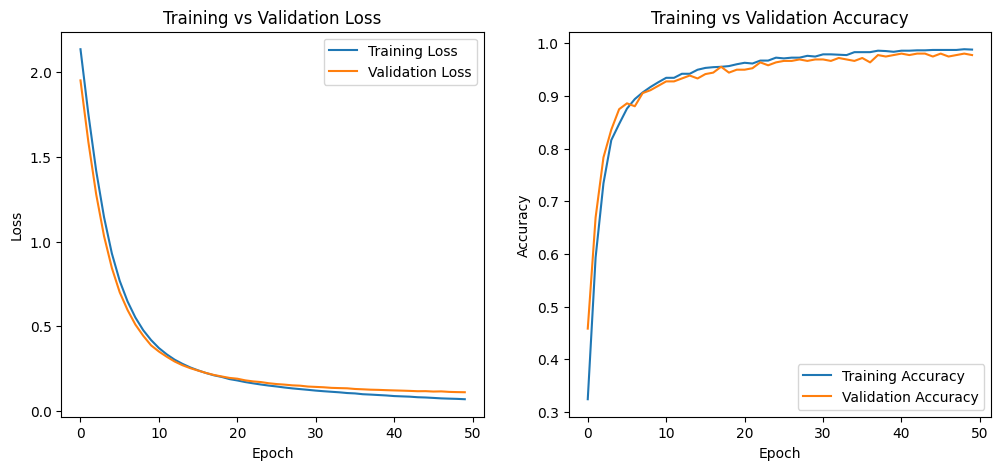

In [6]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.show()
